In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

file_to_load = "crash_info.csv"

# Read Purchasing File and store into Pandas data frame
traffic_df = pd.read_csv(file_to_load)
traffic_df.head()

,X,Y,OBJECTID,ACC_ID,ROAD_NO,ROAD_NAME,COMMON_ROAD_NAME,CWAY,SLK,INTERSECTION_NO,...,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,115.792274,-32.029452,27585440,10231294,1190012,Preston Point Rd,Preston Point Rd,S,0.86,47160.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
1,115.821106,-31.901343,27585441,10231300,H561,Hutton St on to Mitchell Fwy (Southbound),Hutton St on to Mitchell Fwy (Southbound),S,0.00,4347.0,...,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0
2,115.970937,-32.066115,27585442,10231306,1040003,Spencer Rd,Spencer Rd,L,4.97,43773.0,...,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
3,115.852685,-31.952160,27585443,10231312,1240111,Hay St,Hay St,S,2.92,NaN,...,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
4,115.949014,-31.906427,27585444,10231318,1110017,Palmerston St,Palmerston St,S,0.47,37514.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0


In [2]:
severity_groupby=traffic_df.groupby("SEVERITY")
severity_count=severity_groupby["ACC_ID"].nunique()
severity_count


SEVERITY
Fatal          746
Hospital      6928
Medical      17779
PDO Major    72991
PDO Minor    38232
Name: ACC_ID, dtype: int64

In [4]:
fatal = traffic_df.loc[traffic_df["SEVERITY"] == "Fatal"]
fatal_count = len(fatal["ACC_ID"].unique())
fatal_count

hospital = traffic_df.loc[traffic_df["SEVERITY"] == "Hospital"]
hospital_count = len(hospital["ACC_ID"].unique())
hospital_count  

medical = traffic_df.loc[traffic_df["SEVERITY"] == "Medical"]
medical_count = len(medical["ACC_ID"].unique())
medical_count

crash_count = fatal_count + hospital_count + medical_count

fatal_percentage = "{:.2f}%".format(fatal_count / crash_count * 100)
fatal_percentage

hospital_percentage = "{:.2f}%".format(hospital_count / crash_count * 100)
hospital_percentage

medical_percentage = "{:.2f}%".format(medical_count / crash_count * 100)
medical_percentage


severity_summary = pd.DataFrame({
    "severity category":["Fatal", "Hospital", "Medical"],
    "Total Count":[fatal_count, hospital_count, medical_count],
    "Percentage of Severity":[fatal_percentage, hospital_percentage, medical_percentage],})

severity_summary=severity_summary.set_index("severity category")
severity_summary


,Total Count,Percentage of Severity
severity category,,
Fatal,746,2.93%
Hospital,6928,27.22%
Medical,17779,69.85%


In [5]:
severity_data = pd.DataFrame({
    "severity category":["Fatal", "Hospital", "Medical"],
    "Total Count":[fatal_count, hospital_count, medical_count],})

severity_data


,severity category,Total Count
0,Fatal,746
1,Hospital,6928
2,Medical,17779


Text(0, 0.5, 'Count of Accidents')

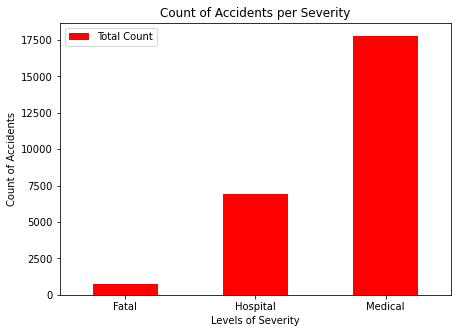

In [6]:
bar_plot_data = severity_summary.plot.bar(figsize = (7,5), fontsize = 10, color = 'red', rot='horizontal',title='Count of Accidents per Severity')

bar_plot_data.set_xlabel("Levels of Severity")
bar_plot_data.set_ylabel("Count of Accidents")

In [7]:
midblock = traffic_df.loc[traffic_df["ACCIDENT_TYPE"] == "Midblock"]
midblock_count = len(midblock["ACC_ID"].unique())
midblock_count

intersection = traffic_df.loc[traffic_df["ACCIDENT_TYPE"] == "Intersection"]
intersection_count = len(intersection["ACC_ID"].unique())
intersection_count 

total_count = midblock_count + intersection_count

midblock_percentage = "{:.2f}%".format(midblock_count / total_count * 100)
midblock_percentage

intersection_percentage = "{:.2f}%".format(intersection_count / total_count * 100)
intersection_percentage

accident_summary = pd.DataFrame({
    "accident type category":["Midblock", "Intersection"],
    "Total Count":[midblock_count, intersection_count],
    "Percentage of Accident Type":[midblock_percentage, intersection_percentage],})

accident_summary

,accident type category,Total Count,Percentage of Accident Type
0,Midblock,64527,47.21%
1,Intersection,72149,52.79%


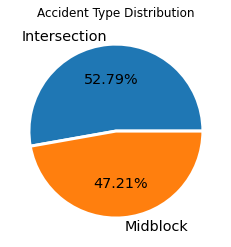

In [8]:
accident_type_data = traffic_df.groupby('ACCIDENT_TYPE').count()['ACC_ID']
accident_type_df = pd.DataFrame(accident_type_data)
accident_type_df

plt.pie(accident_type_data,labels=accident_type_data.index,autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})
plt.title('Accident Type Distribution')
plt.show()

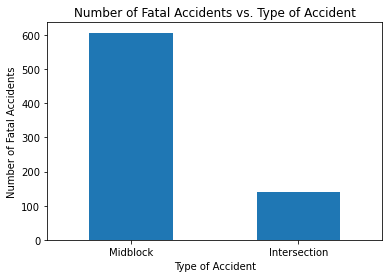

In [9]:
severity_type_groupby = traffic_df.groupby(["SEVERITY"])["ACCIDENT_TYPE"].value_counts()
severity_type_groupby

severity_type_groupby["Fatal"].plot(kind="bar", title="Number of Fatal Accidents vs. Type of Accident",rot='horizontal')
plt.ylabel("Number of Fatal Accidents")
plt.xlabel("Type of Accident")

plt.show()

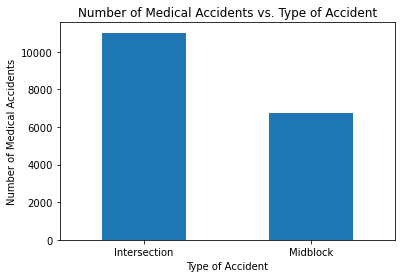

In [26]:
severity_type_groupby["Medical"].plot(kind="bar", title="Number of Medical Accidents vs. Type of Accident",rot='horizontal')
plt.ylabel("Number of Medical Accidents")
plt.xlabel("Type of Accident")

plt.show()

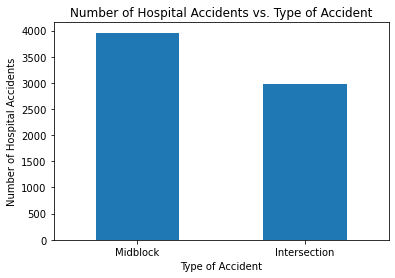

In [27]:
severity_type_groupby["Hospital"].plot(kind="bar", title="Number of Hospital Accidents vs. Type of Accident",rot='horizontal')
plt.ylabel("Number of Hospital Accidents")
plt.xlabel("Type of Accident")

plt.show()

In [14]:
critical_value = st.chi2.ppf(q=0.95, df = 1)
critical_value

3.841458820694124

In [12]:
accident_type_data = traffic_df.groupby('ACCIDENT_TYPE').count()['ACC_ID']
accident_type_df = pd.DataFrame(accident_type_data)
accident_type_df

accident_stats = pd.DataFrame({
    "accident type":["Midblock", "Intersection"],
    "observed":[midblock_count, intersection_count],
    "expected":[68338, 68338],})

accident_stats=accident_stats.set_index("accident type")
accident_stats


,observed,expected
accident type,,
Midblock,64527,68338
Intersection,72149,68338


In [13]:
st.chisquare(accident_stats['observed'], accident_stats['expected'])

#reject null hypothesis - we conclude that the differences seen in number of accidents per type of accident are statistically significant.accident_stats

Power_divergenceResult(statistic=425.0554888934414, pvalue=1.9367554530148811e-94)

In [18]:
time_bins = [0, 259, 559, 859, 1159, 1459, 1759, 2059, 2359]
time_names = ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"]

group_time_df = traffic_df
group_time_df["Time Interval"] = pd.cut(group_time_df["CRASH_TIME"],time_bins, labels=time_names)
group_time_df

,X,Y,OBJECTID,ACC_ID,ROAD_NO,ROAD_NAME,COMMON_ROAD_NAME,CWAY,SLK,INTERSECTION_NO,...,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED,Time Interval
0,115.792274,-32.029452,27585440,10231294,1190012,Preston Point Rd,Preston Point Rd,S,0.86,47160.0,...,PDO Major,Right Angle,NaN,0,0,0,0,2,0,9-12
1,115.821106,-31.901343,27585441,10231300,H561,Hutton St on to Mitchell Fwy (Southbound),Hutton St on to Mitchell Fwy (Southbound),S,0.00,4347.0,...,PDO Major,Rear End,NaN,0,0,0,0,2,0,15-18
2,115.970937,-32.066115,27585442,10231306,1040003,Spencer Rd,Spencer Rd,L,4.97,43773.0,...,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0,9-12
3,115.852685,-31.952160,27585443,10231312,1240111,Hay St,Hay St,S,2.92,NaN,...,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0,6-9
4,115.949014,-31.906427,27585444,10231318,1110017,Palmerston St,Palmerston St,S,0.47,37514.0,...,PDO Major,Right Angle,NaN,0,0,0,0,2,0,6-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136671,115.759319,-31.746864,27722111,10246888,H016,Mitchell Fwy,Mitchell Fwy,R,26.83,NaN,...,Medical,Rear End,NaN,0,1,0,0,1,0,6-9
136672,115.848896,-32.225176,27722112,10246912,H015,Kwinana Fwy,Kwinana Fwy,R,29.99,NaN,...,Medical,Rear End,NaN,0,0,0,0,2,0,6-9
136673,115.918802,-31.985293,27722113,10246918,1290117,Oats St,Oats St,S,1.05,NaN,...,PDO Major,Hit Object,Entering / Leaving Driveway,1,0,0,0,1,0,18-21
136674,115.791280,-32.074725,27722114,10246924,H002,Melville Mandurah Hwy,Stock Rd,R,2.88,75484.0,...,PDO Major,Right Turn Thru,NaN,0,0,0,0,2,0,15-18


In [19]:
group_time_df["Time Interval"].value_counts()

15-18    38546
12-15    25254
9-12     22767
6-9      21505
18-21    15616
21-24     6817
3-6       2985
0-3       2601
Name: Time Interval, dtype: int64

In [20]:
severity_time_groupby = group_time_df.groupby(["SEVERITY"])["Time Interval"].value_counts()
severity_time_groupby



SEVERITY   Time Interval
Fatal      15-18              156
           12-15              114
           18-21              100
           9-12                98
           21-24               83
           6-9                 80
           0-3                 60
           3-6                 53
Hospital   15-18             1633
           12-15             1246
           9-12              1055
           18-21             1008
           6-9                866
           21-24              552
           0-3                271
           3-6                243
Medical    15-18             5206
           6-9               3416
           12-15             3173
           9-12              2931
           18-21             1829
           21-24              635
           3-6                306
           0-3                200
PDO Major  15-18            20772
           12-15            13349
           9-12             12134
           6-9              11033
           18-21       

In [21]:
severity_time_groupby["Fatal"]

Time Interval
15-18    156
12-15    114
18-21    100
9-12      98
21-24     83
6-9       80
0-3       60
3-6       53
Name: Time Interval, dtype: int64

In [22]:
fatal_results = [60, 53, 80, 98, 114, 156, 100, 83]

Fatal_time_df = pd.DataFrame({"Time Slots":time_names,
                "Number of Fatal Accidents":fatal_results})

Fatal_time_df=Fatal_time_df.set_index("Time Slots")
Fatal_time_df


,Number of Fatal Accidents
Time Slots,
0-3,60
3-6,53
6-9,80
9-12,98
12-15,114
15-18,156
18-21,100
21-24,83


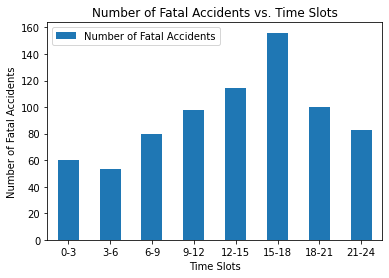

In [23]:
Fatal_time_df.plot(kind="bar", title="Number of Fatal Accidents vs. Time Slots",rot=0)
plt.ylabel("Number of Fatal Accidents")
plt.xlabel("Time Slots")
plt.show()

In [24]:
time_groupby = group_time_df.groupby(["Time Interval"])
time_count=time_groupby["ACC_ID"].nunique()
time_count



Time Interval
0-3       2601
3-6       2985
6-9      21505
9-12     22767
12-15    25254
15-18    38546
18-21    15616
21-24     6817
Name: ACC_ID, dtype: int64

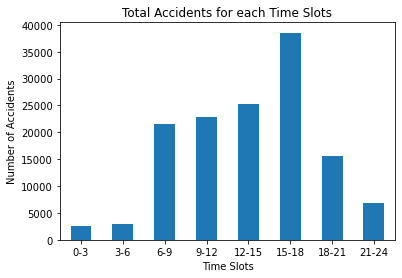

In [25]:
time_count.plot(kind="bar", title="Total Accidents for each Time Slots",rot=0)
plt.ylabel("Number of Accidents")
plt.xlabel("Time Slots")
plt.show()